In [72]:
import pandas as pd
import numpy as np

In [73]:
column_names=['user_id','movie_id','ratings','timestamp']
movie_ratings=pd.read_csv("ratings.csv",sep=',')

In [74]:
movies #for each unique user, get movie information on unique movie ids

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [75]:
movie_titles=pd.read_csv("movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
df=pd.merge(movie_ratings, movie_titles, on="movieId")

In [77]:
df.head() #merged dataset

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


# Exploratory Data Analysis

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #white background
%matplotlib inline #see graphs within jupyter notebook

UsageError: unrecognized arguments: #see graphs within jupyter notebook


In [79]:
#Get the average rating of movies
df_avg=pd.DataFrame(df.groupby('title')['rating'].mean())

In [80]:
df_avg

,rating
title,
$5 a Day (2008),4.000000
'71 (2014),2.500000
'Round Midnight (1986),4.000000
'Salem's Lot (2004),3.000000
'Til There Was You (1997),2.500000
...,...
eXistenZ (1999),3.350000
loudQUIETloud: A Film About the Pixies (2006),3.500000
xXx (2002),2.461538


In [81]:
df_no_of_ratings=df.groupby('title')['title'].count() #Get total no of ratings for each movie

In [82]:
df_no_of_ratings

title
$5 a Day (2008)                                   1
'71 (2014)                                        1
'Round Midnight (1986)                            1
'Salem's Lot (2004)                               1
'Til There Was You (1997)                         2
                                                 ..
eXistenZ (1999)                                  10
loudQUIETloud: A Film About the Pixies (2006)     1
xXx (2002)                                       13
xXx: State of the Union (2005)                    2
¡Three Amigos! (1986)                            12
Name: title, Length: 6695, dtype: int64

In [83]:
df_avg['number']=pd.DataFrame(df.groupby('title')['rating'].count())

In [84]:
df_avg

,rating,number
title,,
$5 a Day (2008),4.000000,1
'71 (2014),2.500000,1
'Round Midnight (1986),4.000000,1
'Salem's Lot (2004),3.000000,1
'Til There Was You (1997),2.500000,2
...,...,...
eXistenZ (1999),3.350000,10
loudQUIETloud: A Film About the Pixies (2006),3.500000,1
xXx (2002),2.461538,13


# Histograms

(0.0, 4000.0)

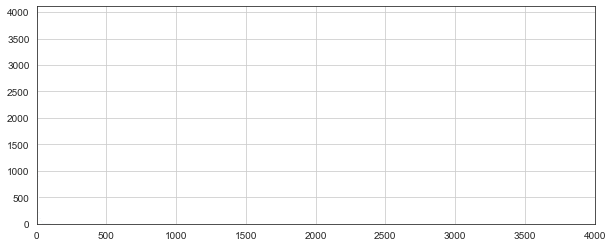

In [87]:
plt.figure(figsize=(10,4))
df_avg['number'].hist(bins=80)
plt.xlim(0, 4000)
#plt.ylim(-0.04, 0.04)

<AxesSubplot:>

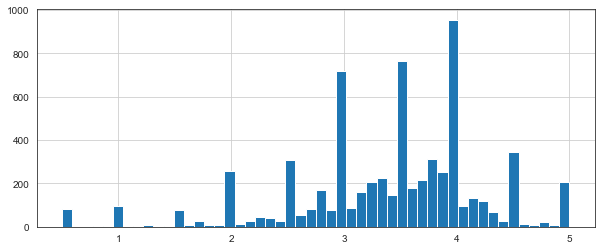

In [86]:
plt.figure(figsize=(10,4))
df_avg['rating'].hist(bins=50)

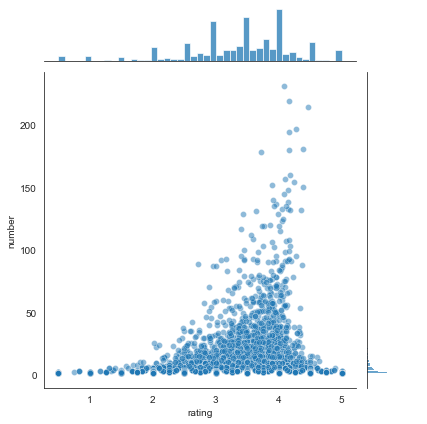

In [88]:
sns.jointplot(x='rating',y='number',data=df_avg,alpha=0.5)

In [92]:
movie_matrix=df.pivot_table(index='userId',columns='title',values='rating')
 #Pivot table to understand the movies and ratings specific to user id
movie_matrix

title,$5 a Day (2008),'71 (2014),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),(Dis)Honesty: The Truth About Lies (2015),...And Justice for All (1979),10 (1979),...,Zorba the Greek (Alexis Zorbas) (1964),Zulu (1964),[REC] (2007),[REC]² (2009),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
444,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_avg.sort_values('number',ascending=False)

,rating,number
title,,
Forrest Gump (1994),4.086580,231
Pulp Fiction (1994),4.168950,219
"Shawshank Redemption, The (1994)",4.462617,214
"Silence of the Lambs, The (1991)",4.274112,197
"Matrix, The (1999)",4.167526,194
...,...,...
King of New York (1990),5.000000,1
King of the Ants (2003),3.000000,1
"Kingdom II, The (Riget II) (1997)",4.000000,1


In [95]:
fg_rating=movie_matrix['Forrest Gump (1994)']

In [96]:
fg_rating.head()

userId
1    NaN
2    4.5
3    4.0
4    NaN
5    4.0
Name: Forrest Gump (1994), dtype: float64

In [97]:
similar_to_fg=movie_matrix.corrwith(fg_rating) #to get correlation between elements in the pandas series

C:\Users\anuka\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\anuka\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [98]:
corr_fg=pd.DataFrame(similar_to_fg,columns=['Correlation'])
corr_fg.dropna(inplace=True)

In [99]:
corr_fg.head()

,Correlation
title,
'Til There Was You (1997),-1.000000
"'burbs, The (1989)",0.584311
(500) Days of Summer (2009),0.541206
10 (1979),-1.000000
10 Cloverfield Lane (2016),0.689701


In [100]:
corr_fg.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
She's Out of My League (2010),1.0
Murder on the Orient Express (1974),1.0
Kate & Leopold (2001),1.0
Sunrise: A Song of Two Humans (1927),1.0
"Asphalt Jungle, The (1950)",1.0
Sirens (1994),1.0
Assault on Precinct 13 (1976),1.0
Firefox (1982),1.0
"Presidio, The (1988)",1.0


In [101]:
corr_fg=corr_fg.join(df_avg['number'])
corr_fg

,Correlation,number
title,,
'Til There Was You (1997),-1.000000,2
"'burbs, The (1989)",0.584311,8
(500) Days of Summer (2009),0.541206,31
10 (1979),-1.000000,5
10 Cloverfield Lane (2016),0.689701,9
...,...,...
[REC] (2007),0.494059,9
eXistenZ (1999),0.267261,10
xXx (2002),0.244383,13


In [102]:
corr_fg[corr_fg['number']>50].sort_values('Correlation',ascending=False).head() # only find movies where ratings are>50

,Correlation,number
title,,
Forrest Gump (1994),1.000000,231
Top Gun (1986),0.655628,58
"Hunt for Red October, The (1990)",0.653410,64
"O Brother, Where Art Thou? (2000)",0.639031,59
"Departed, The (2006)",0.603117,63
